We have chosen Mobile Price Classification dataset from the Kaggle website. This Dataset contains 2000 rows and 21 collumns, we have chosen to use the Train data for our classification. The dataset itself does not contain any null values , hence we have randomly assigned missing values throughout the dataset and further used different startegies to fix the missing values in the dataset.
Dataset link : https://www.kaggle.com/iabhishekofficial/mobile-price-classification

The goal of the project is to classify the mobiles to different price ranges ( 0, 1 , 2, 3)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#Change the working directory to Airbnb folder
os.chdir("C://Users//vikas//Desktop//AirBnb//Mobile Price/")


In [3]:
Data_train = pd.read_csv("Mobile_Price_Classification(Dataset).csv")

In [4]:
Data_train.shape # The dataset contains 2000 rows and 21 columns

(2000, 21)

In [5]:
Data_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1958.000000,2000.0000,1989.000000,2000.000000,2000.000000,1990.000000,1978.000000,1989.000000,1980.000000,2000.000000,...,1983.000000,1987.000000,1993.000000,2000.000000,1986.000000,2000.000000,1994.000000,1990.000000,2000.000000,2000.000000
mean,1237.733912,0.4950,1.521518,0.509500,4.309500,0.522111,32.071790,0.500855,140.152020,4.520500,...,645.298033,1252.344741,2123.308078,12.306500,5.780967,11.011000,0.760782,0.502513,0.507000,1.500000
std,442.248020,0.5001,0.816418,0.500035,4.341444,0.499636,18.227137,0.288398,35.445816,2.287837,...,444.727235,432.878178,1086.380656,4.213245,4.359518,5.463955,0.426713,0.500119,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,844.500000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.500000,1205.000000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1224.500000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,140.000000,4.000000,...,562.000000,1248.000000,2146.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1619.000000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,948.000000,1633.500000,3068.000000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    1958 non-null float64
blue             2000 non-null int64
clock_speed      1989 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           1990 non-null float64
int_memory       1978 non-null float64
m_dep            1989 non-null float64
mobile_wt        1980 non-null float64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        1983 non-null float64
px_width         1987 non-null float64
ram              1993 non-null float64
sc_h             2000 non-null int64
sc_w             1986 non-null float64
talk_time        2000 non-null int64
three_g          1994 non-null float64
touch_screen     1990 non-null float64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(12), int64(9)
memory usage: 328.2 KB


In [7]:
#converting price_range to categorical variable
Data_train['price_range'] = Data_train['price_range'].astype(object)

In [8]:
Data_train.isna().sum() #total number of missing data in the dataset

battery_power    42
blue              0
clock_speed      11
dual_sim          0
fc                0
four_g           10
int_memory       22
m_dep            11
mobile_wt        20
n_cores           0
pc                0
px_height        17
px_width         13
ram               7
sc_h              0
sc_w             14
talk_time         0
three_g           6
touch_screen     10
wifi              0
price_range       0
dtype: int64

There are a number of missing values, the columns with missing values are :

In [9]:
Data_train.isna().sum()[Data_train.isna().sum()>0]

battery_power    42
clock_speed      11
four_g           10
int_memory       22
m_dep            11
mobile_wt        20
px_height        17
px_width         13
ram               7
sc_w             14
three_g           6
touch_screen     10
dtype: int64

In [10]:
#Replace NaN values in Battery Power column with the mean of their price range
price_range_battery=Data_train.groupby('price_range')['battery_power'].mean()

Data_P0=Data_train[Data_train['price_range']==0]
Data_P1=Data_train[Data_train['price_range']==1]
Data_P2=Data_train[Data_train['price_range']==2]
Data_P3=Data_train[Data_train['price_range']==3]

Data_P0['battery_power']=Data_P0['battery_power'].fillna(price_range_battery[0])
Data_P1['battery_power']=Data_P1['battery_power'].fillna(price_range_battery[1])
Data_P2['battery_power']=Data_P2['battery_power'].fillna(price_range_battery[2])
Data_P3['battery_power']=Data_P3['battery_power'].fillna(price_range_battery[3])

C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [11]:
Data_train = pd.concat([Data_P0, Data_P1, Data_P2, Data_P3]).sort_index()

In [12]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null float64
blue             2000 non-null int64
clock_speed      1989 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           1990 non-null float64
int_memory       1978 non-null float64
m_dep            1989 non-null float64
mobile_wt        1980 non-null float64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        1983 non-null float64
px_width         1987 non-null float64
ram              1993 non-null float64
sc_h             2000 non-null int64
sc_w             1986 non-null float64
talk_time        2000 non-null int64
three_g          1994 non-null float64
touch_screen     1990 non-null float64
wifi             2000 non-null int64
price_range      2000 non-null object
dtypes: float64(12), int64(8), object(1)
memory usage: 343.8+ KB


 Here use to strategy to compute the mean of every column with respective to each price_range and then replace the NA values with the corresponding mean value 

In [13]:
# Treating null values for clock_speed column, replaced the null values with the respective price_rage mean

price_range_clockspeed=Data_train.groupby('price_range')['clock_speed'].mean()

Data_P0=Data_train[Data_train['price_range']==0]
Data_P1=Data_train[Data_train['price_range']==1]
Data_P2=Data_train[Data_train['price_range']==2]
Data_P3=Data_train[Data_train['price_range']==3]

Data_P0['clock_speed']=Data_P0['clock_speed'].fillna(price_range_clockspeed[0])
Data_P1['clock_speed']=Data_P1['clock_speed'].fillna(price_range_clockspeed[1])
Data_P2['clock_speed']=Data_P2['clock_speed'].fillna(price_range_clockspeed[2])
Data_P3['clock_speed']=Data_P3['clock_speed'].fillna(price_range_clockspeed[3])

Data_train = pd.concat([Data_P0, Data_P1, Data_P2, Data_P3]).sort_index()




C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [14]:
#int_memory
price_range_int_memory=Data_train.groupby('price_range')['int_memory'].mean()

Data_P0=Data_train[Data_train['price_range']==0]
Data_P1=Data_train[Data_train['price_range']==1]
Data_P2=Data_train[Data_train['price_range']==2]
Data_P3=Data_train[Data_train['price_range']==3]

Data_P0['int_memory']=Data_P0['int_memory'].fillna(price_range_int_memory[0])
Data_P1['int_memory']=Data_P1['int_memory'].fillna(price_range_int_memory[1])
Data_P2['int_memory']=Data_P2['int_memory'].fillna(price_range_int_memory[2])
Data_P3['int_memory']=Data_P3['int_memory'].fillna(price_range_int_memory[3])

Data_train = pd.concat([Data_P0, Data_P1, Data_P2, Data_P3]).sort_index()




C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [15]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null float64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           1990 non-null float64
int_memory       2000 non-null float64
m_dep            1989 non-null float64
mobile_wt        1980 non-null float64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        1983 non-null float64
px_width         1987 non-null float64
ram              1993 non-null float64
sc_h             2000 non-null int64
sc_w             1986 non-null float64
talk_time        2000 non-null int64
three_g          1994 non-null float64
touch_screen     1990 non-null float64
wifi             2000 non-null int64
price_range      2000 non-null object
dtypes: float64(12), int64(8), object(1)
memory usage: 343.8+ KB


In [16]:
#m_dep

price_range_m_dep=Data_train.groupby('price_range')['m_dep'].mean()

Data_P0=Data_train[Data_train['price_range']==0]
Data_P1=Data_train[Data_train['price_range']==1]
Data_P2=Data_train[Data_train['price_range']==2]
Data_P3=Data_train[Data_train['price_range']==3]

Data_P0['m_dep']=Data_P0['m_dep'].fillna(price_range_m_dep[0])
Data_P1['m_dep']=Data_P1['m_dep'].fillna(price_range_m_dep[1])
Data_P2['m_dep']=Data_P2['m_dep'].fillna(price_range_m_dep[2])
Data_P3['m_dep']=Data_P3['m_dep'].fillna(price_range_m_dep[3])

Data_train = pd.concat([Data_P0, Data_P1, Data_P2, Data_P3]).sort_index()

C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [17]:
#mobile_wt
price_range_mobile_wt=Data_train.groupby('price_range')['mobile_wt'].mean()

Data_P0=Data_train[Data_train['price_range']==0]
Data_P1=Data_train[Data_train['price_range']==1]
Data_P2=Data_train[Data_train['price_range']==2]
Data_P3=Data_train[Data_train['price_range']==3]

Data_P0['mobile_wt']=Data_P0['mobile_wt'].fillna(price_range_mobile_wt[0])
Data_P1['mobile_wt']=Data_P1['mobile_wt'].fillna(price_range_mobile_wt[1])
Data_P2['mobile_wt']=Data_P2['mobile_wt'].fillna(price_range_mobile_wt[2])
Data_P3['mobile_wt']=Data_P3['mobile_wt'].fillna(price_range_mobile_wt[3])

Data_train = pd.concat([Data_P0, Data_P1, Data_P2, Data_P3]).sort_index()

C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [18]:
#px_height
price_range_px_height=Data_train.groupby('price_range')['px_height'].mean()

Data_P0=Data_train[Data_train['price_range']==0]
Data_P1=Data_train[Data_train['price_range']==1]
Data_P2=Data_train[Data_train['price_range']==2]
Data_P3=Data_train[Data_train['price_range']==3]

Data_P0['px_height']=Data_P0['px_height'].fillna(price_range_px_height[0])
Data_P1['px_height']=Data_P1['px_height'].fillna(price_range_px_height[1])
Data_P2['px_height']=Data_P2['px_height'].fillna(price_range_px_height[2])
Data_P3['px_height']=Data_P3['px_height'].fillna(price_range_px_height[3])

Data_train = pd.concat([Data_P0, Data_P1, Data_P2, Data_P3]).sort_index()

C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [19]:
#px_width
price_range_px_width=Data_train.groupby('price_range')['px_width'].mean()

Data_P0=Data_train[Data_train['price_range']==0]
Data_P1=Data_train[Data_train['price_range']==1]
Data_P2=Data_train[Data_train['price_range']==2]
Data_P3=Data_train[Data_train['price_range']==3]

Data_P0['px_width']=Data_P0['px_width'].fillna(price_range_px_width[0])
Data_P1['px_width']=Data_P1['px_width'].fillna(price_range_px_width[1])
Data_P2['px_width']=Data_P2['px_width'].fillna(price_range_px_width[2])
Data_P3['px_width']=Data_P3['px_width'].fillna(price_range_px_width[3])

Data_train = pd.concat([Data_P0, Data_P1, Data_P2, Data_P3]).sort_index()

C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [20]:
#ram
price_range_ram=Data_train.groupby('price_range')['ram'].mean()

Data_P0=Data_train[Data_train['price_range']==0]
Data_P1=Data_train[Data_train['price_range']==1]
Data_P2=Data_train[Data_train['price_range']==2]
Data_P3=Data_train[Data_train['price_range']==3]

Data_P0['ram']=Data_P0['ram'].fillna(price_range_ram[0])
Data_P1['ram']=Data_P1['ram'].fillna(price_range_ram[1])
Data_P2['ram']=Data_P2['ram'].fillna(price_range_ram[2])
Data_P3['ram']=Data_P3['ram'].fillna(price_range_ram[3])

Data_train = pd.concat([Data_P0, Data_P1, Data_P2, Data_P3]).sort_index()

C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [21]:
#sc_w

price_range_sc_w=Data_train.groupby('price_range')['sc_w'].mean()

Data_P0=Data_train[Data_train['price_range']==0]
Data_P1=Data_train[Data_train['price_range']==1]
Data_P2=Data_train[Data_train['price_range']==2]
Data_P3=Data_train[Data_train['price_range']==3]

Data_P0['sc_w']=Data_P0['sc_w'].fillna(price_range_sc_w[0])
Data_P1['sc_w']=Data_P1['sc_w'].fillna(price_range_sc_w[1])
Data_P2['sc_w']=Data_P2['sc_w'].fillna(price_range_sc_w[2])
Data_P3['sc_w']=Data_P3['sc_w'].fillna(price_range_sc_w[3])

Data_train = pd.concat([Data_P0, Data_P1, Data_P2, Data_P3]).sort_index()

C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [22]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null float64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           1990 non-null float64
int_memory       2000 non-null float64
m_dep            2000 non-null float64
mobile_wt        2000 non-null float64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null float64
px_width         2000 non-null float64
ram              2000 non-null float64
sc_h             2000 non-null int64
sc_w             2000 non-null float64
talk_time        2000 non-null int64
three_g          1994 non-null float64
touch_screen     1990 non-null float64
wifi             2000 non-null int64
price_range      2000 non-null object
dtypes: float64(12), int64(8), object(1)
memory usage: 343.8+ KB


In [23]:
# Now that we have handled missing values for the numerical columns, lets impute the the values in the similar way for the categorical columns
#As we can see each of the categorical columns have the data type as int, lets convert them to object data type
Data_train['dual_sim'] = Data_train['dual_sim'].astype(object)
Data_train['four_g'] = Data_train['four_g'].astype(object)
Data_train['three_g'] = Data_train['three_g'].astype(object)
Data_train['touch_screen'] = Data_train['touch_screen'].astype(object)
Data_train['wifi'] = Data_train['wifi'].astype(object)


In [24]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null float64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null object
fc               2000 non-null int64
four_g           1990 non-null object
int_memory       2000 non-null float64
m_dep            2000 non-null float64
mobile_wt        2000 non-null float64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null float64
px_width         2000 non-null float64
ram              2000 non-null float64
sc_h             2000 non-null int64
sc_w             2000 non-null float64
talk_time        2000 non-null int64
three_g          1994 non-null object
touch_screen     1990 non-null object
wifi             2000 non-null object
price_range      2000 non-null object
dtypes: float64(9), int64(6), object(6)
memory usage: 343.8+ KB


In [25]:
# lets follow the same strategy, but this time lets impute the rows with the mode of the values with respective to each price range
#Note : We are not finding the mean/mode of the column itself, instead we are grouping the NA values with respect to each price range and then find the mean/mode for that price range


In [26]:
#four_g
mode_fourg_P0=Data_train[Data_train.price_range==0]['four_g'].mode()
mode_fourg_P0[0]

mode_fourg_P1=Data_train[Data_train.price_range==1]['four_g'].mode()
mode_fourg_P1[0]

mode_fourg_P2=Data_train[Data_train.price_range==2]['four_g'].mode()
mode_fourg_P2[0]

mode_fourg_P3=Data_train[Data_train.price_range==3]['four_g'].mode()
mode_fourg_P3[0]



1.0

In [27]:
Data_P0['four_g']=Data_P0['four_g'].fillna(mode_fourg_P0[0])
Data_P1['four_g']=Data_P1['four_g'].fillna(mode_fourg_P1[0])
Data_P2['four_g']=Data_P2['four_g'].fillna(mode_fourg_P2[0])
Data_P3['four_g']=Data_P3['four_g'].fillna(mode_fourg_P3[0])

In [28]:
Data_train = pd.concat([Data_P0, Data_P1, Data_P2, Data_P3]).sort_index()

In [29]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null float64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null float64
int_memory       2000 non-null float64
m_dep            2000 non-null float64
mobile_wt        2000 non-null float64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null float64
px_width         2000 non-null float64
ram              2000 non-null float64
sc_h             2000 non-null int64
sc_w             2000 non-null float64
talk_time        2000 non-null int64
three_g          1994 non-null float64
touch_screen     1990 non-null float64
wifi             2000 non-null int64
price_range      2000 non-null object
dtypes: float64(12), int64(8), object(1)
memory usage: 343.8+ KB


In [30]:
#three_g
mode_threeg_P0=Data_train[Data_train.price_range==0]['three_g'].mode()
mode_fourg_P0[0]

mode_threeg_P1=Data_train[Data_train.price_range==1]['three_g'].mode()
mode_threeg_P1[0]

mode_threeg_P2=Data_train[Data_train.price_range==2]['three_g'].mode()
mode_threeg_P2[0]

mode_threeg_P3=Data_train[Data_train.price_range==3]['three_g'].mode()
mode_threeg_P3[0]

Data_P0['three_g']=Data_P0['three_g'].fillna(mode_threeg_P0[0])
Data_P1['three_g']=Data_P1['three_g'].fillna(mode_threeg_P1[0])
Data_P2['three_g']=Data_P2['three_g'].fillna(mode_threeg_P2[0])
Data_P3['three_g']=Data_P3['three_g'].fillna(mode_threeg_P3[0])

Data_train = pd.concat([Data_P0, Data_P1, Data_P2, Data_P3]).sort_index()


In [31]:
#Touch screen

mode_tc_P0=Data_train[Data_train.price_range==0]['touch_screen'].mode()
mode_tc_P0[0]

mode_tc_P1=Data_train[Data_train.price_range==1]['touch_screen'].mode()
mode_tc_P1[0]

mode_tc_P2=Data_train[Data_train.price_range==2]['touch_screen'].mode()
mode_tc_P2[0]

mode_tc_P3=Data_train[Data_train.price_range==3]['touch_screen'].mode()
mode_tc_P3[0]

Data_P0['touch_screen']=Data_P0['touch_screen'].fillna(mode_tc_P0[0])
Data_P1['touch_screen']=Data_P1['touch_screen'].fillna(mode_tc_P1[0])
Data_P2['touch_screen']=Data_P2['touch_screen'].fillna(mode_tc_P2[0])
Data_P3['touch_screen']=Data_P3['touch_screen'].fillna(mode_tc_P3[0])

Data_train = pd.concat([Data_P0, Data_P1, Data_P2, Data_P3]).sort_index()

In [32]:
Data_train['dual_sim'] = Data_train['dual_sim'].astype(object)
Data_train['four_g'] = Data_train['four_g'].astype(object)
Data_train['three_g'] = Data_train['three_g'].astype(object)
Data_train['touch_screen'] = Data_train['touch_screen'].astype(object)
Data_train['wifi'] = Data_train['wifi'].astype(object)


In [33]:
Data_train.info()
# we can be sure that there are no more missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null float64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null object
fc               2000 non-null int64
four_g           2000 non-null object
int_memory       2000 non-null float64
m_dep            2000 non-null float64
mobile_wt        2000 non-null float64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null float64
px_width         2000 non-null float64
ram              2000 non-null float64
sc_h             2000 non-null int64
sc_w             2000 non-null float64
talk_time        2000 non-null int64
three_g          2000 non-null object
touch_screen     2000 non-null object
wifi             2000 non-null object
price_range      2000 non-null object
dtypes: float64(9), int64(6), object(6)
memory usage: 343.8+ KB


# Data Exploration

In [34]:
Data_train['price_range'].unique()
# The price_range is for 0,1,2,3 

array([1, 2, 3, 0], dtype=object)

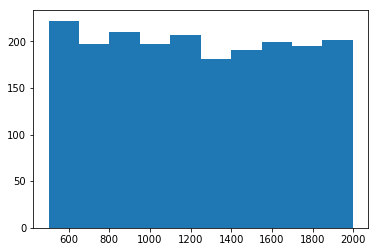

In [35]:
plt.hist(Data_train['battery_power'])
plt.show() # we observe that low power batteries are slightly more in number

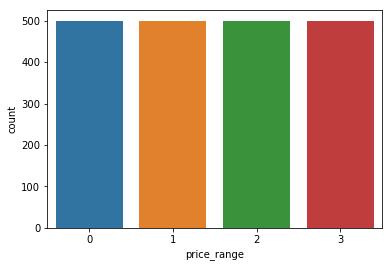

In [36]:
sns.countplot(Data_train['price_range'])
plt.show()   # The data has approximately the same amount of  price_range across the dataset

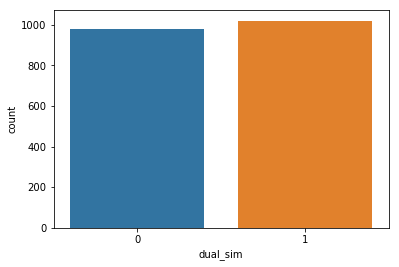

In [37]:
sns.countplot(Data_train['dual_sim'])
plt.show() # there are more number phones with dual sim than those without it.

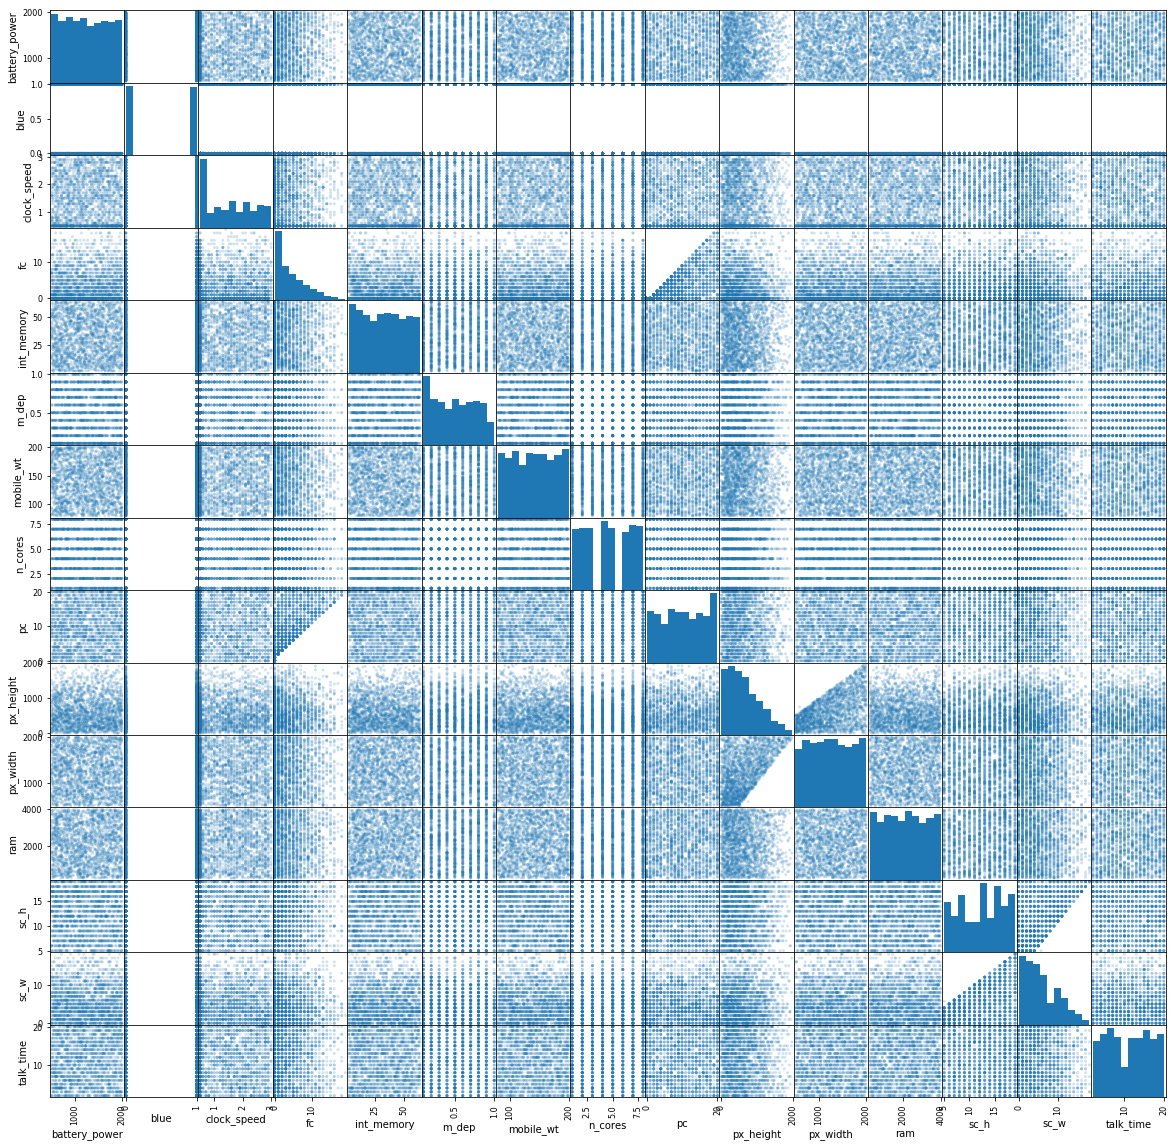

In [38]:
pd.plotting.scatter_matrix(Data_train, alpha = '0.2', figsize = (20,20))
plt.show()

In [39]:
# As we can see above , some of the data such as clock_speed , fc , m_dep , px_height and sc_w are positively skewed 

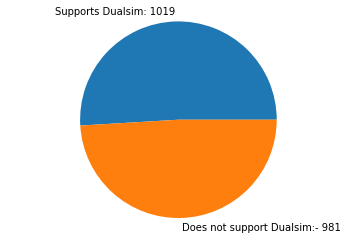

In [40]:
x=Data_train['dual_sim'].value_counts()
labels='Supports Dualsim: '+str(x[1]),'Does not support Dualsim:- '+str(x[0])
sizes=[x[1],x[0]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



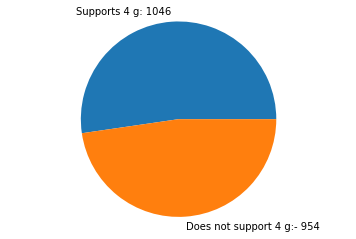

In [41]:
x=Data_train['four_g'].value_counts()
labels='Supports 4 g: '+str(x[1]),'Does not support 4 g:- '+str(x[0])
sizes=[x[1],x[0]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels)
ax1.axis('equal') 
plt.show()

# Phones with 4g support are high in number

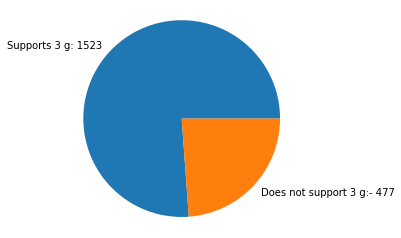

In [42]:
#pie chart representation
x=Data_train['three_g'].value_counts()
labels='Supports 3 g: '+str(x[1]),'Does not support 3 g:- '+str(x[0])
sizes=[x[1],x[0]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

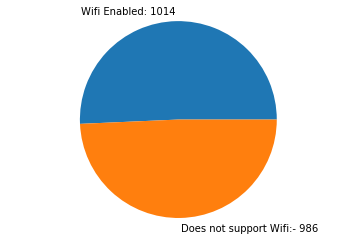

In [43]:
x=Data_train['wifi'].value_counts()
labels='Wifi Enabled: '+str(x[1]),'Does not support Wifi:- '+str(x[0])
sizes=[x[1],x[0]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#1014 phones are wifi enabled and 986 does not support wifi

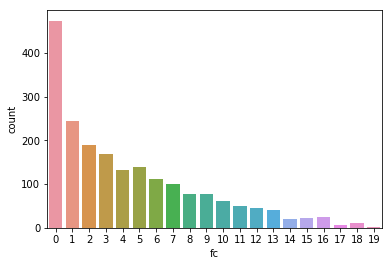

In [44]:
sns.countplot(x='fc', data=Data_train)
plt.show()

#most of the phones are have front camera = 0


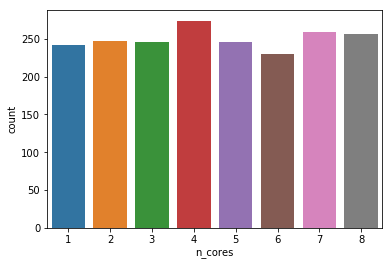

In [45]:
sns.countplot(x='n_cores', data=Data_train)
plt.show()

# the cores are almost equally distributed and there is less variation

In [46]:
# Lets observe how some of feautures are distributed with respect to price range : Bivariant Analysis
Data_train['price_range'] = Data_train['price_range'].astype(int)

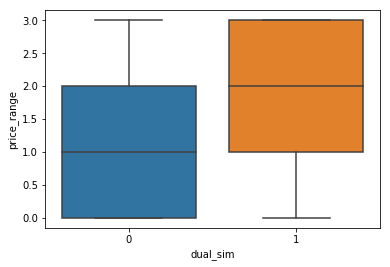

In [47]:
sns.boxplot(x='dual_sim',y='price_range',data=Data_train)
plt.show()

#phone that supports dula sim are more costlier than others 

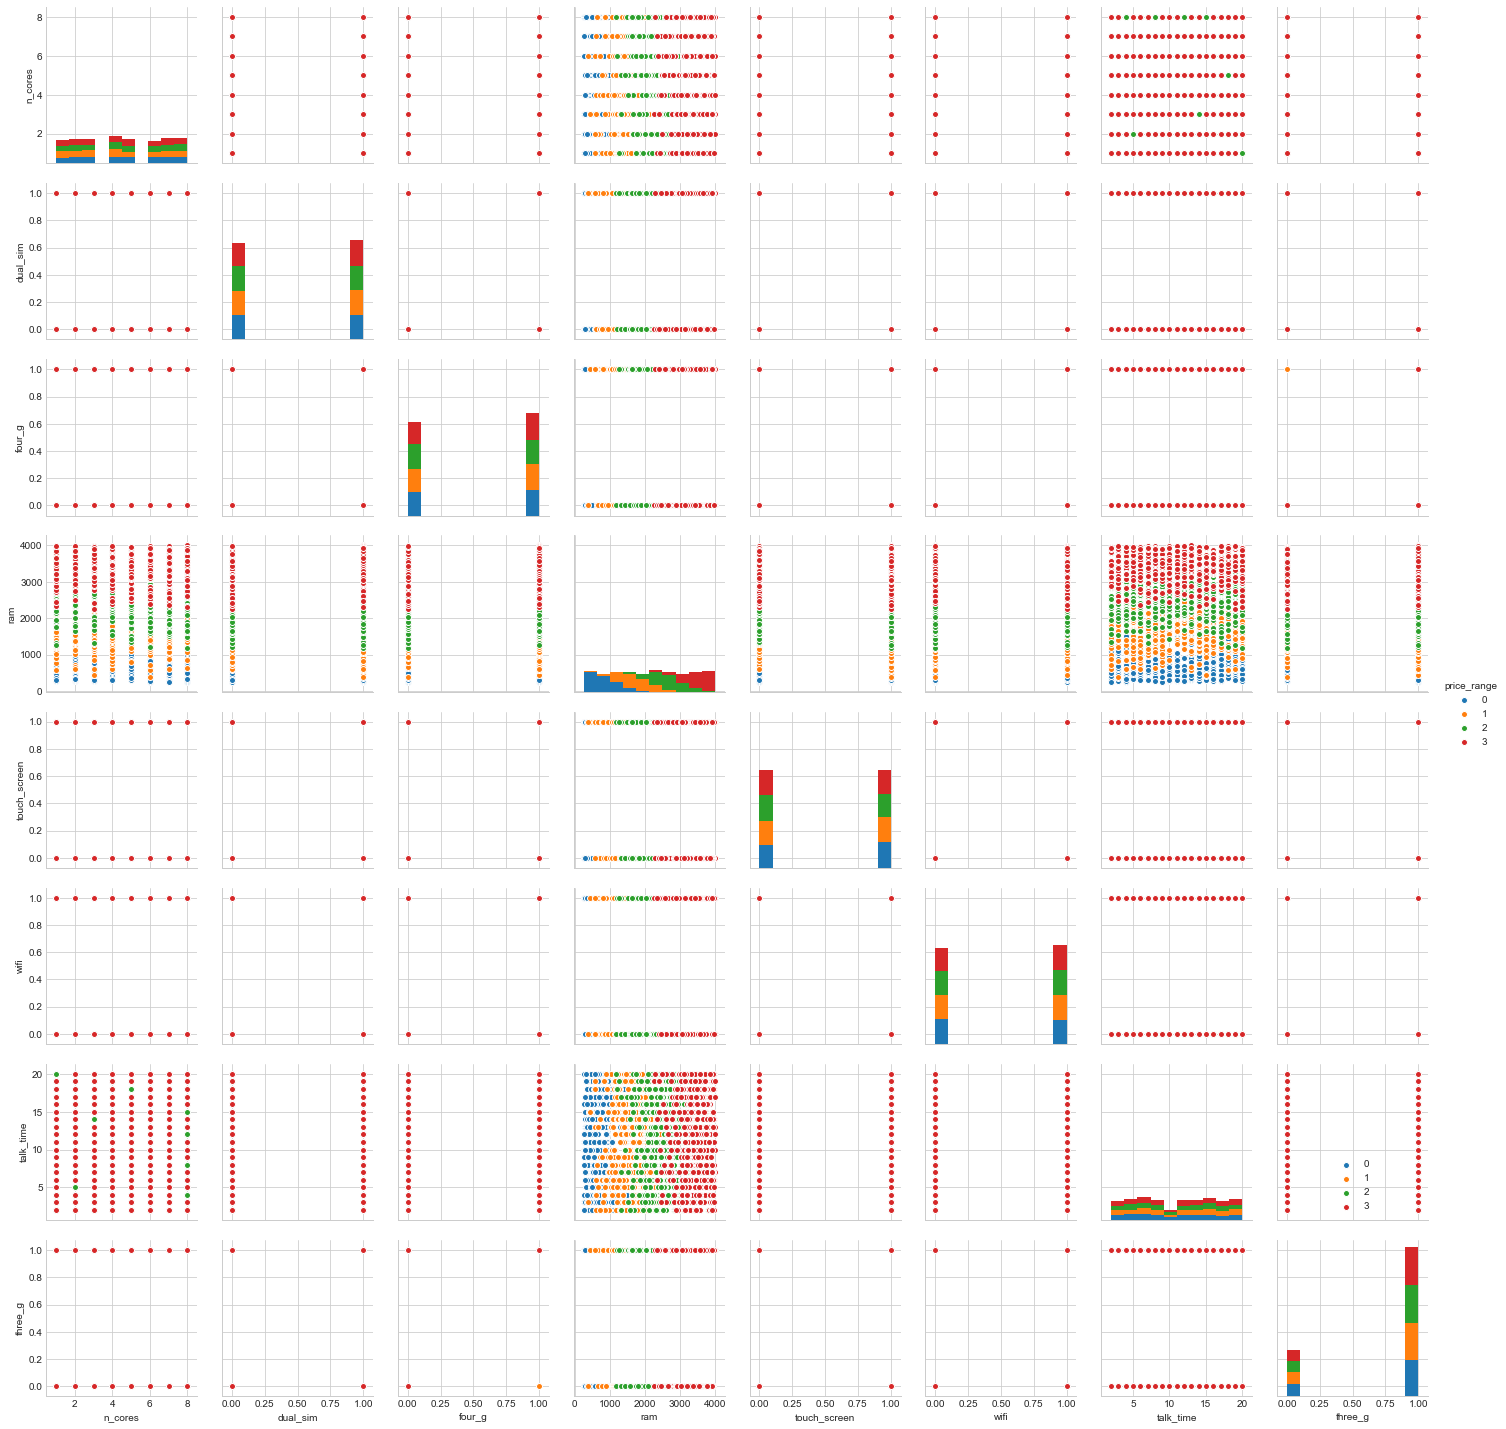

In [48]:
# pairwise scatter plot: Pair-Plot.
sns.set_style("whitegrid");
sns.pairplot(Data_train,hue='price_range',vars=['n_cores', 'dual_sim','four_g', 'ram','touch_screen','wifi','talk_time','three_g'])
plt.legend()
plt.show() 

# Data Modelling 
Now that we have completed the Data preprocessing and the Data Exploration , lets look at the Data Modelling
Here I have modelled using 
1) KNeighbors Classifier
2) Softmax Regression
3) Decison tree Classifier
4) SVC Classifier

# Splitting the Dataset and Scaling

In [49]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [50]:
X=Data_train.drop('price_range',axis=1)
y=Data_train['price_range'].values.astype(int)

In [51]:
# Splitting the dataset and scaling 
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0,)
scaler = MinMaxScaler()
# we have chozen to use min max scaler to retain the value of 0 , 1 for the categorical values
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)


In [52]:
len(y_test)

500

# Hard Voting Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import recall_score
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split


log_clf = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', max_iter = 50, random_state = 0)
log_clf.fit(X_train, y_train)
rf = RandomForestClassifier(max_depth=3)
rf.fit(X_train, y_train)
svm_clf = SVC(kernel = 'rbf', C = 1)
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

print('Training data and its score :')
from sklearn.metrics import accuracy_score
for clf in (log_clf, rf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

y_pred=voting_clf.predict(X_train)
round(recall_score(y_train,y_pred, average='macro'),4)


y_pred=voting_clf.predict(X_test)


print('\nTest set and its scores :',metrics.accuracy_score(y_test, y_pred))
print('Recall score :',round(recall_score(y_test,y_pred, average='macro'),4))

C:\Users\vikas\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Training data and its score :
LogisticRegression 0.92
RandomForestClassifier 0.712
SVC 0.886
VotingClassifier 0.898

Test set and its scores : 0.898
Recall score : 0.8984


C:\Users\vikas\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\vikas\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\vikas\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Soft Voting Classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import recall_score
import numpy as np
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split


log_clf = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', max_iter = 50, random_state = 0)
log_clf.fit(X_train, y_train)
rf = RandomForestClassifier(max_depth=3)
rf.fit(X_train, y_train)
svm_clf = SVC(kernel = 'rbf', C = 1, probability=True)
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rf), ('svc', svm_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

print('Training data and its score :')
from sklearn.metrics import accuracy_score
for clf in (log_clf, rf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

y_pred=voting_clf.predict(X_train)
round(recall_score(y_train,y_pred, average='macro'),4)

#print('\nTest set and its scores :')
y_pred=voting_clf.predict(X_test)
##round(recall_score(y_test,y_pred, average='macro'),4)


print('\nTest set and its scores :',metrics.accuracy_score(y_test, y_pred))
print('Recall score :',round(recall_score(y_test,y_pred, average='macro'),4))

Training data and its score :
LogisticRegression 0.92
RandomForestClassifier 0.772
SVC 0.886
VotingClassifier 0.912

Test set and its scores : 0.912
Recall score : 0.9086


C:\Users\vikas\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\vikas\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\vikas\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Bagging Classifiers

Bagging with decision trees

In [55]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
print('Bagging with Decision tree classifier')
dt_clf = DecisionTreeClassifier(random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=True, random_state=0, oob_score=True)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

#print(accuracy_score(y_test, y_pred))

#bag_clf.fit(X_train, y_train)
print('Train score: {:.3f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.3f}'.format(bag_clf.score(X_test, y_test)))



Bagging with Decision tree classifier
Train score: 0.836
Test score: 0.828


Bagging with SVM classifier

In [56]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

svm_clf = SVC(random_state=0, kernel='rbf', C=10)
bag_clf = BaggingClassifier(svm_clf, n_estimators=500, max_samples=100, bootstrap=True, random_state=0, oob_score=True)

bag_clf.fit(X_train, y_train)
print('Bagging with SVM Classifier')
print('Train score: {:.3f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.3f}'.format(bag_clf.score(X_test, y_test)))

Bagging with SVM Classifier
Train score: 0.877
Test score: 0.842


# Pasting Classifiers

In [57]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
print('Pasting with Decision tree classifier')
dt_clf_pasting = DecisionTreeClassifier(random_state=0)
bag_clf_pasting = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=True, random_state=0, oob_score=True)

bag_clf_pasting.fit(X_train, y_train)
y_pred = bag_clf_pasting.predict(X_test)

#print(accuracy_score(y_test, y_pred))

#bag_clf.fit(X_train, y_train)
print('Train score: {:.3f}'.format(bag_clf_pasting.score(X_train, y_train)))
print('Test score: {:.3f}'.format(bag_clf_pasting.score(X_test, y_test)))

Pasting with Decision tree classifier
Train score: 0.836
Test score: 0.828


In [58]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

svm_clf_pasting = SVC(random_state=0, kernel='rbf', C=10)
bag_clf_pasting = BaggingClassifier(svm_clf_pasting, n_estimators=500, max_samples=100, bootstrap=False, random_state=0)#, oob_score=True)

bag_clf_pasting.fit(X_train, y_train)
print('Pasting with SVM Classifier')
print('Train score: {:.3f}'.format(bag_clf_pasting.score(X_train, y_train)))
print('Test score: {:.3f}'.format(bag_clf_pasting.score(X_test, y_test)))

Pasting with SVM Classifier
Train score: 0.880
Test score: 0.832


# Ada Boosting

ADA Boosting with Random Forest

In [68]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(RandomForestClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)
print('Ada Boosting with Random Forest')
print('Train score: {:.3f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.3f}'.format(ada_clf.score(X_test, y_test)))




Ada Boosting with Random Forest
Train score: 0.645
Test score: 0.586


ADA Boosting with SVM Classifier

In [69]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(SVC(kernel='rbf', C=1), n_estimators=200, algorithm="SAMME", learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)
print('Ada Boosting with SVM Classifier')
print('Train score: {:.3f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.3f}'.format(ada_clf.score(X_test, y_test)))




Ada Boosting with SVM Classifier
Train score: 0.260
Test score: 0.220


# Gradient Boosting

In [61]:
#default params gradient boosting model
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.998
Accuracy on test set: 0.916


In [62]:
#slow learning gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.850
Accuracy on test set: 0.794


([<matplotlib.axis.YTick at 0x1fdc7a0ce80>,
 <a list of 20 Text yticklabel objects>)

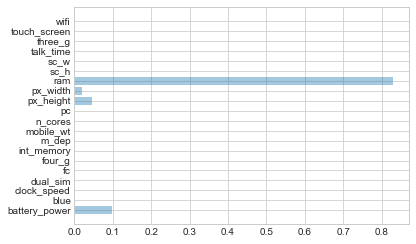

In [63]:

#Feature Importance using Gradient boosting
y_list = gbrt.feature_importances_
y_pos = np.arange(len(y_list))
features = Data_train.columns
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)

In [64]:
from prettytable import PrettyTable

    
x = PrettyTable()
x.field_names = ["Model","Train Accuracy", "Test Accuracy"]
x.add_row(["Bagging with Decision Tree Classifier",0.836,0.828]) 
x.add_row(["Bagging with SVM Classifier",0.877, 0.842])
x.add_row(["Pasting with Decision Tree Classsifier",0.836, 0.828])
x.add_row(["Pasting with SVM Classifier", 0.880, 0.832])
x.add_row(["Ada Boost with Random Forest classifier",0.645, 0.586])
x.add_row(["Ada Boosting with SVM classifier",0.260, 0.220])
x.add_row(["Gradient Boosting", 0.998, 0.916])

print(x)

+-----------------------------------------+----------------+---------------+
|                  Model                  | Train Accuracy | Test Accuracy |
+-----------------------------------------+----------------+---------------+
|  Bagging with Decision Tree Classifier  |     0.836      |     0.828     |
|       Bagging with SVM Classifier       |     0.877      |     0.842     |
|  Pasting with Decision Tree Classsifier |     0.836      |     0.828     |
|       Pasting with SVM Classifier       |      0.88      |     0.832     |
| Ada Boost with Random Forest classifier |     0.645      |     0.586     |
|     Ada Boosting with SVM classifier    |      0.26      |      0.22     |
|            Gradient Boosting            |     0.998      |     0.916     |
+-----------------------------------------+----------------+---------------+



# PCA

In [65]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [66]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
pca.n_components_

17

In [67]:
np.sum(pca.explained_variance_ratio_)

0.966423485203577

In [70]:
print(d)

17


In [71]:
pca = PCA(n_components = 17)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [72]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# prepare models
models = []

models.append(('SVM_Linear', SVC(C=2, kernel='linear', random_state=0)))
models.append(('SVM_Poly', SVC(C=2, kernel='poly', random_state=0)))
models.append(('LinearSVC', LinearSVC(C=2, multi_class='ovr', penalty='l2', random_state=0)))

# evaluate each model in turn
results = []
names = []
#test=[]
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=0)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg1 = "%s: %f " % (name, cv_results.mean())#, cv_results.std())
    print(msg1)
    



#print("\nConfusion Matrix:\n%s"%confusion_matrix(predicted_price_test,y_test))
#print("\nClassification Report:\n%s"%classification_report(predicted_price_test,y_test))

SVM_Linear: 0.944000 
SVM_Poly: 0.478667 
LinearSVC: 0.809333 


Note : Some of the models which we had not included in project 1 has been executed below. 


(The reason being these models take longer time to run with very bad scores. For example - Kernelized SVMs require the computation of a distance function between each point in the dataset, which is the dominating cost of O(n features × n square observations). The storage of the distances is a burden on memory, so they're recomputed on the fly. )

## SVC Linear kernel - 

In [73]:
#SVC Linear kernel
from sklearn.svm import SVC
svm=SVC(random_state=0, kernel='linear')
svm.fit(X_train,y_train)
print("train accuracy:",svm.score(X_train,y_train))
print("test accuracy:",svm.score(X_test,y_test))

train accuracy: 0.9566666666666667
test accuracy: 0.942


## SVC Polynomial kernel

In [74]:
#SVC poly kernel
from sklearn.svm import SVC
svm=SVC(random_state=0, kernel='poly')
svm.fit(X_train,y_train)
print("train accuracy:",svm.score(X_train,y_train))
print("test accuracy:",svm.score(X_test,y_test))

train accuracy: 0.3546666666666667
test accuracy: 0.312


## LinearSVC 

In [75]:
#LinearSVC with normal X_train and y_train
from sklearn.svm import LinearSVC
svm=LinearSVC(C=2, multi_class='ovr', penalty='l2', random_state=0)
svm.fit(X_train,y_train)
print("train accuracy:",svm.score(X_train,y_train))
print("test accuracy:",svm.score(X_test,y_test))

train accuracy: 0.842
test accuracy: 0.84


## LinearSVC on PCA Reduced data

In [76]:
#LinearSVC with X_train_reduced (PCA) and y_train 
from sklearn.svm import LinearSVC
svm=LinearSVC(C=2, multi_class='ovr', penalty='l2', random_state=0)
svm.fit(X_train_reduced,y_train)
print("train accuracy:",svm.score(X_train_reduced,y_train))
print("test accuracy:",svm.score(X_test_reduced,y_test))

train accuracy: 0.84
test accuracy: 0.834


## SVC Linear kernel on PCA Reduced data

In [77]:
#SVC poly with X_train_reduced (PCA) and y_train 

svm=SVC(C=2, kernel='linear', random_state=0)
svm.fit(X_train_reduced,y_train)
print("train accuracy:",svm.score(X_train_reduced,y_train))
print("test accuracy:",svm.score(X_test_reduced,y_test))

train accuracy: 0.9446666666666667
test accuracy: 0.932


## SVC Polynomial kernel on PCA Reduced data

In [78]:
#SVC poly with X_train_reduced (PCA) and y_train 

svm=SVC(C=2, kernel='poly', random_state=0)
svm.fit(X_train_reduced,y_train)
print("train accuracy:",svm.score(X_train_reduced,y_train))
print("test accuracy:",svm.score(X_test_reduced,y_test))

train accuracy: 0.26
test accuracy: 0.22


## KNN on PCA Reduced data

In [79]:
knn=KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train_reduced,y_train)
print("train accuracy:",knn.score(X_train_reduced,y_train))
print("test accuracy:",knn.score(X_test_reduced,y_test))



train accuracy: 0.566
test accuracy: 0.446


## Softmax Logistic regression on PCA Reduced data

In [80]:
soft=LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10 , max_iter=5000)
soft.fit(X_train_reduced,y_train)
print("train accuracy:",soft.score(X_train_reduced,y_train))
y_pred=soft.predict(X_test_reduced)
print("test accuracy :",accuracy_score(y_test, y_pred))

train accuracy: 0.9486666666666667
test accuracy : 0.936


## Decision tree classifier on PCA Reduced data

In [81]:
dtree=DecisionTreeClassifier(max_depth=10)
dtree.fit(X_train_reduced,y_train)
print("train accuracy:",dtree.score(X_train_reduced,y_train))
y_pred=soft.predict(X_test_reduced)
print("test accuracy :",accuracy_score(y_test, y_pred))

train accuracy: 0.9606666666666667
test accuracy : 0.936


## SVC RBF kernel on PCA Reduced data

In [82]:
#SVC poly with X_train_reduced (PCA) and y_train 

svm=SVC(C=2, kernel='rbf', random_state=0)
svm.fit(X_train_reduced,y_train)
print("train accuracy:",svm.score(X_train_reduced,y_train))
print("test accuracy:",svm.score(X_test_reduced,y_test))

train accuracy: 0.934
test accuracy: 0.906


LR: 0.929333 
KNN: 0.450000 
CART: 0.604667 
SVM_rbf: 0.892000 
SVM_Linear: 0.923333 
SVM_Poly: 0.249333 
LinearSVC: 0.815333 


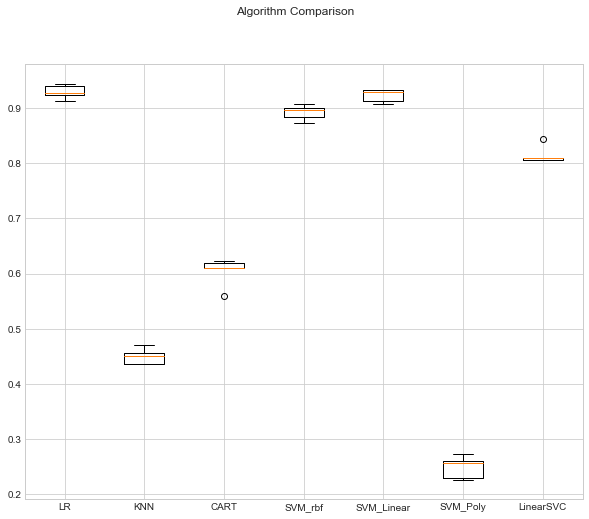

In [83]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from tqdm import tqdm

# prepare models
models = []
models.append(('LR', LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10 , max_iter=5000)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=23)))
models.append(('CART', DecisionTreeClassifier(max_depth=10)))

models.append(('SVM_rbf', SVC(C=2, kernel='rbf', random_state=0)))
models.append(('SVM_Linear', SVC(C=2, kernel='linear', random_state=0)))
models.append(('SVM_Poly', SVC(C=2, kernel='poly', random_state=0)))
models.append(('LinearSVC', LinearSVC(C=2, multi_class='ovr', penalty='l2', random_state=0)))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=0)
    cv_results = model_selection.cross_val_score(model, X_train_reduced, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f " % (name, cv_results.mean())#, cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure(figsize=(10,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


#print("\nConfusion Matrix:\n%s"%confusion_matrix(predicted_price_test,y_test))
#print("\nClassification Report:\n%s"%classification_report(predicted_price_test,y_test))

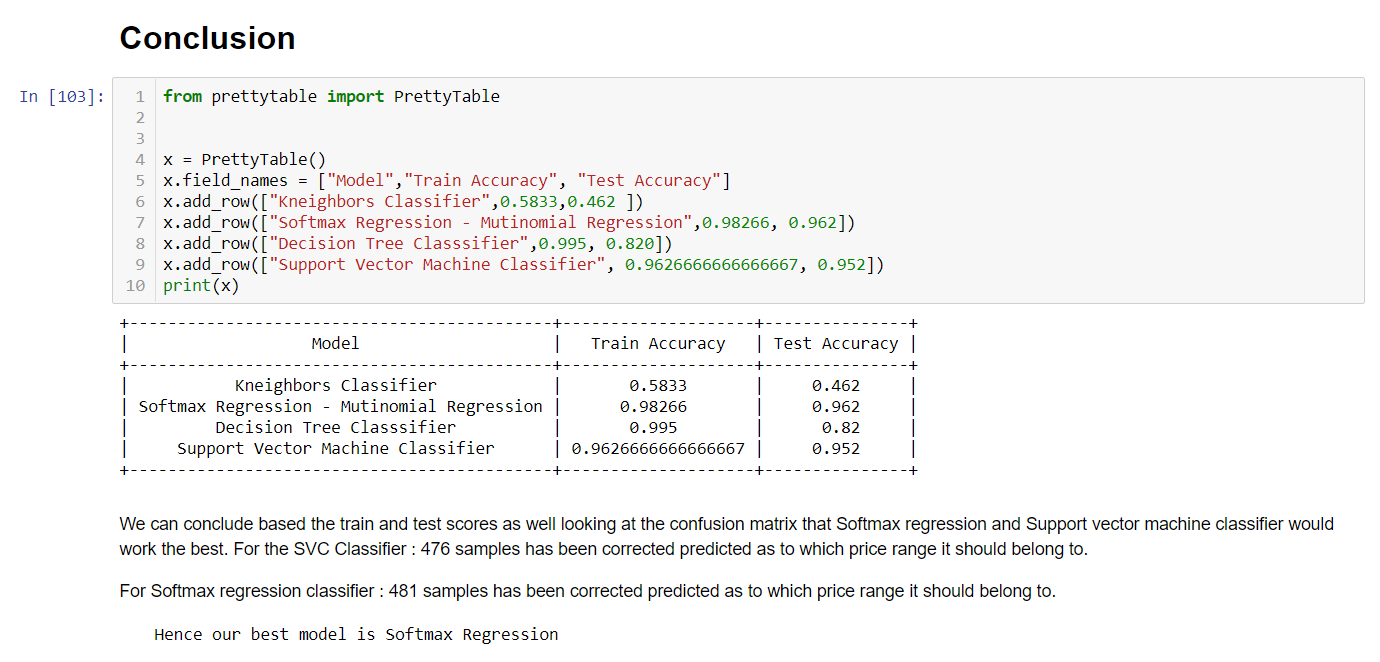

In [84]:
#From the previous project, I have considered the same values obtained from the conclusion table -
from IPython.display import Image
Image("C://Users//vikas//Desktop//conclusion.png")


In [85]:
from prettytable import PrettyTable

    
x = PrettyTable()
x.field_names = ["Model","Train Accuracy", "Test Accuracy", "Train Accuracy with PCA", "Test Accuracy with PCA"]
x.add_row(["Kneighbors Classifier",0.5833,0.462, 0.566, 0.446 ]) 
x.add_row(["Softmax Regression - Multinomial",0.98266, 0.962, 0.9486, 0.936])
x.add_row(["Decision Tree Classsifier",0.995, 0.820, 0.96067, 0.936])
x.add_row(["SVM Classifier (RBF)", 0.9626666666666667, 0.952, 0.934, 0.906 ])
x.add_row(["Support Vector Machine (Linear)",0.95667, 0.942, 0.94467, 0.932 ])
x.add_row(["Support Vector Machine (Poly)",0.3546, 0.312, 0.26, 0.22])
x.add_row(["SVC Linear", 0.842, 0.84, 0.84, 0.834 ])
x.add_row(["SVC Linear", 0.842, 0.84, 0.84, 0.834 ])

print(x)

+----------------------------------+--------------------+---------------+-------------------------+------------------------+
|              Model               |   Train Accuracy   | Test Accuracy | Train Accuracy with PCA | Test Accuracy with PCA |
+----------------------------------+--------------------+---------------+-------------------------+------------------------+
|      Kneighbors Classifier       |       0.5833       |     0.462     |          0.566          |         0.446          |
| Softmax Regression - Multinomial |      0.98266       |     0.962     |          0.9486         |         0.936          |
|    Decision Tree Classsifier     |       0.995        |      0.82     |         0.96067         |         0.936          |
|       SVM Classifier (RBF)       | 0.9626666666666667 |     0.952     |          0.934          |         0.906          |
| Support Vector Machine (Linear)  |      0.95667       |     0.942     |         0.94467         |         0.932          |


In theory the PCA makes no difference, but in practice it improves rate of training. Also, the results are very identitical as we have retained atleast 95% of the variance in our data. PCA helps in reducing the dimension of our dataset and hence reduces the execution time.

# Neural Networks

## Model 1

In [86]:
# (One hot) Encoding on Dependent variable

Y_train = pd.get_dummies(y_train)
Y_test = pd.get_dummies(y_test)
Y_train.head()

,0,1,2,3
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,0,0,1,0
4,0,0,0,1


In [87]:
#1 - creating the model
from keras import Sequential
from keras.layers import Dense

model = Sequential()
#input layer
model.add(Dense(64, activation = 'relu', input_dim = X_train.shape[1]))
#hidden layer
model.add(Dense(32, activation = 'relu'))
#output layer
model.add(Dense(4, activation = 'softmax'))
#regression

#2 - compile: create computational graph
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy'] )

#3 - training
model.fit(X_train, Y_train, epochs = 5, batch_size = 1)

#4 - Evaluation
model.evaluate(X_train, Y_train)

Using TensorFlow backend.
C:\Users\vikas\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikas\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikas\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikas\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

Epoch 1/5
1500/1500 [==============================] - ETA: 9:24 - loss: 1.2896 - acc: 0.0000e+0 - ETA: 15s - loss: 1.3886 - acc: 0.4146    - ETA: 9s - loss: 1.3696 - acc: 0.3803 - ETA: 6s - loss: 1.3869 - acc: 0.330 - ETA: 5s - loss: 1.3882 - acc: 0.302 - ETA: 4s - loss: 1.3766 - acc: 0.314 - ETA: 4s - loss: 1.3678 - acc: 0.321 - ETA: 3s - loss: 1.3545 - acc: 0.338 - ETA: 3s - loss: 1.3495 - acc: 0.350 - ETA: 3s - loss: 1.3425 - acc: 0.359 - ETA: 2s - loss: 1.3363 - acc: 0.369 - ETA: 2s - loss: 1.3194 - acc: 0.394 - ETA: 2s - loss: 1.3047 - acc: 0.407 - ETA: 2s - loss: 1.2963 - acc: 0.413 - ETA: 2s - loss: 1.2856 - acc: 0.422 - ETA: 2s - loss: 1.2792 - acc: 0.427 - ETA: 1s - loss: 1.2662 - acc: 0.428 - ETA: 1s - loss: 1.2538 - acc: 0.433 - ETA: 1s - loss: 1.2382 - acc: 0.444 - ETA: 1s - loss: 1.2236 - acc: 0.454 - ETA: 1s - loss: 1.2065 - acc: 0.463 - ETA: 1s - loss: 1.1990 - acc: 0.464 - ETA: 1s - loss: 1.1841 - acc: 0.473 - ETA: 1s - loss: 1.1755 - acc: 0.473 - ETA: 1s - loss: 1.166

1500/1500 [==============================] - ETA:  - 0s 53us/step


[0.18788754149278006, 0.9246666669845581]

In [88]:
print()

In [89]:
model.evaluate(X_test, Y_test)

500/500 [==============================] - ETA:  - 0s 30us/step


[0.2234951775074005, 0.9020000009536743]

# Model 2

In [90]:
model1 = Sequential()
#input layer: input)_dim: number of columns in X_train 
model1.add(Dense(10, input_dim = 20, activation = 'relu'))
#hidden layers
#output
model1.add(Dense(1))

# step 2: compile the model -> create the computational graph
model1.compile(loss='mse' , optimizer='sgd' , metrics = ['mse'])

# step 3: train the model: fit epochs and batch_size
model1.fit(X_train, y_train, epochs = 10, batch_size =150 )

# step 4: evalution
model1.evaluate(X_train, y_train)

Epoch 1/10
1500/1500 [==============================] - ETA: 1s - loss: 3.2310 - mean_squared_error: 3.23 - 0s 108us/step - loss: 2.3811 - mean_squared_error: 2.3811
Epoch 2/10
1500/1500 [==============================] - ETA: 0s - loss: 2.0105 - mean_squared_error: 2.01 - 0s 13us/step - loss: 1.5741 - mean_squared_error: 1.5741
Epoch 3/10
1500/1500 [==============================] - ETA: 0s - loss: 1.1426 - mean_squared_error: 1.14 - 0s 13us/step - loss: 1.3661 - mean_squared_error: 1.3661
Epoch 4/10
1500/1500 [==============================] - ETA: 0s - loss: 1.3564 - mean_squared_error: 1.35 - 0s 14us/step - loss: 1.2807 - mean_squared_error: 1.2807
Epoch 5/10
1500/1500 [==============================] - ETA: 0s - loss: 1.2325 - mean_squared_error: 1.23 - 0s 14us/step - loss: 1.2178 - mean_squared_error: 1.2178
Epoch 6/10
1500/1500 [==============================] - ETA: 0s - loss: 1.1371 - mean_squared_error: 1.13 - 0s 13us/step - loss: 1.1634 - mean_squared_error: 1.1634
Epoch 7/1

[0.9691904646555582, 0.9691904646555582]